<a href="https://colab.research.google.com/github/thisisanuragn/ANURAG-N/blob/main/PROJECT_G5(feature_eng%2Cmodel%2Ctunning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Import libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



*   Uploading Encoded data set



In [ ]:
data=pd.read_csv('/content/NEW_ENCODE_HR_DATA (1).csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1.0,2,1,2,0,3,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,1,8.0,1,1,3,1,2,...,1,0,4,10,3,3,10,7,1,7
2,37,1,2,1,2.0,2,4,4,1,2,...,6,1,2,7,3,3,0,0,0,0
3,33,0,1,1,3.0,4,1,4,0,3,...,1,1,3,8,3,3,8,7,3,0
4,27,0,2,1,2.0,1,3,1,1,3,...,9,0,4,6,3,3,2,2,2,2


In [ ]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# **FEATURE ENGINEERING**

In [ ]:
data['Age_YearsAtCompany'] = data['Age'] * data['YearsAtCompany']
data['MonthlyIncome_YearsAtCompany'] = data['MonthlyIncome'] * data['YearsAtCompany']



*   Age_YearsAtCompany : This feature is created by multiplying Age and YearsAtCompany. This interaction term can help capture a relationship between an employee's age and their tenure at the company. It could indicate whether older employees have longer tenures, which might affect their likelihood of attrition.


*   MonthlyIncome_YearsAtCompany :This feature multiplies MonthlyIncome with YearsAtCompany. It aims to capture the cumulative earnings an employee has made at the company over their tenure. Higher values might reflect more experienced or higher-paid employees, potentially correlating with lower attrition if these employees feel valued and compensated.




In [ ]:
data['TotalYearsInRoles'] = data['YearsInCurrentRole'] + data['YearsWithCurrManager']




*   This feature is the sum of YearsInCurrentRole and YearsWithCurrManager. It represents the total number of years an employee has spent in their current role and under their current manager. This can provide insights into stability and experience in specific roles and management relationships.



In [ ]:
data['Satisfaction_Involvement'] = data['JobSatisfaction'] * data['JobInvolvement']



*   This feature is created by multiplying the JobSatisfaction and JobInvolvement scores. The idea behind this feature is to capture an interaction effect between how satisfied an employee is with their job and how involved they are in it. High values might indicate employees who are both highly satisfied and highly involved, potentially contributing to lower attrition.



In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalYearsInRoles,Satisfaction_Involvement,Age_YearsAtCompany,MonthlyIncome_YearsAtCompany
0,41,1,2,2,1.0,2,1,2,0,3,...,0,1,6,4,0,5,9,12,246,35958
1,49,0,1,1,8.0,1,1,3,1,2,...,3,3,10,7,1,7,14,4,490,51300
2,37,1,2,1,2.0,2,4,4,1,2,...,3,3,0,0,0,0,0,6,0,0
3,33,0,1,1,3.0,4,1,4,0,3,...,3,3,8,7,3,0,7,9,264,23272
4,27,0,2,1,2.0,1,3,1,1,3,...,3,3,2,2,2,2,4,6,54,6936


In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Age_YearsAtCompany', 'MonthlyIncome_YearsAtCompany',
       'TotalYearsInRoles', 'Satisfaction_Involvement'],
      dtype='object')

In [ ]:
from google.colab import files

data.to_csv('NEW_FEATURE_DATASET.CSV',index=False)
files.download('NEW_FEATURE_DATASET.CSV')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



*   **Correlation Analysis**



In [ ]:
relevant_columns = ['Age_YearsAtCompany', 'MonthlyIncome_YearsAtCompany',
                    'TotalYearsInRoles', 'Satisfaction_Involvement', 'Attrition']
data_corr = data[relevant_columns + [col for col in data.columns if col not in relevant_columns]]


In [ ]:
correlation_matrix = data_corr.corr()
correlation_matrix

,Age_YearsAtCompany,MonthlyIncome_YearsAtCompany,TotalYearsInRoles,Satisfaction_Involvement,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age_YearsAtCompany,1.000000,0.899659,0.744302,-0.026688,-0.116612,0.458525,-0.008020,0.015899,0.008258,0.093597,...,-0.047238,0.000337,0.035344,0.694083,0.000114,0.005909,0.968052,0.686947,0.595260,0.691306
MonthlyIncome_YearsAtCompany,0.899659,1.000000,0.605696,-0.041664,-0.098409,0.368487,0.010578,0.018088,-0.022752,0.056454,...,-0.028669,0.000085,0.037317,0.670316,0.001543,0.018806,0.870722,0.559796,0.536061,0.561780
TotalYearsInRoles,0.744302,0.605696,1.000000,-0.004782,-0.171075,0.224158,-0.018388,0.049018,0.016701,0.069792,...,-0.108508,-0.038480,-0.008694,0.496606,-0.005317,0.028610,0.825130,0.927017,0.571677,0.924657
Satisfaction_Involvement,-0.026688,-0.041664,-0.004782,1.000000,-0.150714,0.002640,-0.011697,0.005848,0.014142,0.010247,...,-0.043152,0.018742,-0.005393,-0.028143,-0.012807,-0.021211,-0.021672,0.004190,-0.033627,-0.013177
Attrition,-0.116612,-0.098409,-0.171075,-0.150714,1.000000,-0.159205,0.000074,0.063991,0.077874,-0.031373,...,0.043494,0.246118,-0.045872,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,0.458525,0.368487,0.224158,0.002640,-0.159205,1.000000,0.024751,-0.031882,-0.001032,0.208034,...,0.299635,0.028062,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,-0.008020,0.010578,-0.018388,-0.011697,0.000074,0.024751,1.000000,-0.009044,-0.024340,0.000757,...,0.020875,0.016543,-0.035986,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
Department,0.015899,0.018088,0.049018,0.005848,0.063991,-0.031882,-0.009044,1.000000,0.017910,0.007996,...,-0.035882,0.007481,-0.022414,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.008258,-0.022752,0.016701,0.014142,0.077874,-0.001032,-0.024340,0.017910,1.000000,0.021654,...,-0.028334,0.025002,0.006397,0.003943,-0.037649,-0.027205,0.008527,0.017893,0.009918,0.012995
Education,0.093597,0.056454,0.069792,0.010247,-0.031373,0.208034,0.000757,0.007996,0.021654,1.000000,...,0.126317,-0.020322,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065


# **CHI-SUARE TEST & ANOVA**



*   CHI-SQUARE TEST



In [ ]:
from scipy.stats import chi2_contingency, f_oneway

In [ ]:
target = 'Attrition'

In [ ]:
new_features = ['Age_YearsAtCompany', 'MonthlyIncome_YearsAtCompany', 'TotalYearsInRoles', 'Satisfaction_Involvement']

In [ ]:
def chi_square_test(feature, target, data):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

In [ ]:
chi_square_results = {feature: chi_square_test(feature, target, data) for feature in new_features}

In [ ]:
print("Chi-Square Test Results:")
for feature, result in chi_square_results.items():
    print(f"{feature}: Chi2 = {result[0]}, p-value = {result[1]}")

Chi-Square Test Results:
Age_YearsAtCompany: Chi2 = 398.711417743918, p-value = 0.10164178197594739
MonthlyIncome_YearsAtCompany: Chi2 = 1336.7825347627622, p-value = 0.8735551582757954
TotalYearsInRoles: Chi2 = 89.6228494219781, p-value = 2.308523293122012e-07
Satisfaction_Involvement: Chi2 = 44.940785239584514, p-value = 3.776312030023222e-07




*   **conclusion**



1.   TotalYearsInRoles and Satisfaction_Involvement have very low p-values (p < 0.05), indicating a significant relationship with Attrition.
2.   Age_YearsAtCompany and MonthlyIncome_YearsAtCompany have high p-values (p > 0.05), indicating no significant relationship with Attrition.





*   ANOVA



In [ ]:
def anova_test(feature, target, data):
    groups = [data[data[target] == value][feature].values for value in data[target].unique()]
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value

In [ ]:
anova_results = {feature: anova_test(feature, target, data) for feature in new_features}

In [ ]:
print("\nANOVA Test Results:")
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result[0]}, p-value = {result[1]}")


ANOVA Test Results:
Age_YearsAtCompany: F-statistic = 20.23770928312641, p-value = 7.377991051677216e-06
MonthlyIncome_YearsAtCompany: F-statistic = 14.355483764757157, p-value = 0.0001574556281429766
TotalYearsInRoles: F-statistic = 44.25857293717563, p-value = 4.049647321962237e-11
Satisfaction_Involvement: F-statistic = 34.12008170912105, p-value = 6.370395714929262e-09




*   conclusion

All features have very low p-values (p < 0.05), indicating a significant difference in means between Attrition groups.




 **Removing Unwanted Columns**



In [ ]:
significant_features = [feature for feature in new_features if chi_square_results[feature][1] < 0.05
                        and anova_results[feature][1] < 0.05]
data = data.drop(columns=[feature for feature in new_features if feature not in significant_features])



In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalYearsInRoles,Satisfaction_Involvement
0,41,1,2,2,1.0,2,1,2,0,3,...,1,8,0,1,6,4,0,5,9,12
1,49,0,1,1,8.0,1,1,3,1,2,...,4,10,3,3,10,7,1,7,14,4
2,37,1,2,1,2.0,2,4,4,1,2,...,2,7,3,3,0,0,0,0,0,6
3,33,0,1,1,3.0,4,1,4,0,3,...,3,8,3,3,8,7,3,0,7,9
4,27,0,2,1,2.0,1,3,1,1,3,...,4,6,3,3,2,2,2,2,4,6




*   Remove non-significant columns based on the Chi-Square test results
*   Assuming `Age_YearsAtCompany` and `MonthlyIncome_YearsAtCompany` are non-significant



In [ ]:
from google.colab import files

data.to_csv('NEW_FINAL_DATASET.CSV',index=False)
files.download('NEW_FINAL_DATASET.CSV')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalYearsInRoles', 'Satisfaction_Involvement'],
      dtype='object')

# **SCALING**



*  STANDARDSCALAR



In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
sc_data=sc.fit_transform(data)

In [ ]:
datascaled_new=pd.DataFrame(sc_data)
datascaled_new

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.446350,2.280906,0.590048,1.401512,-1.011948,-0.891688,-0.936214,-0.660531,-1.224745,0.379672,...,-1.584178,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0.097302,1.251494
1,1.322365,-0.438422,-0.913194,-0.493817,-0.147516,-1.868426,-0.936214,0.254625,0.816497,-1.026167,...,1.191438,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0.848533,-0.940252
2,0.008343,2.280906,0.590048,-0.493817,-0.888458,-0.891688,1.317445,1.169781,0.816497,-1.026167,...,-0.658973,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-1.254913,-0.392315
3,-0.429664,-0.438422,-0.913194,-0.493817,-0.764968,1.061787,-0.936214,1.169781,-1.224745,0.379672,...,0.266233,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.203190,0.429590
4,-1.086676,-0.438422,0.590048,-0.493817,-0.888458,-1.868426,0.566225,-1.575686,0.816497,0.379672,...,1.191438,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.653928,-0.392315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.438422,-0.913194,-0.493817,1.704838,-0.891688,0.566225,0.254625,0.816497,1.785511,...,0.266233,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873,-0.503682,2.347367
1466,0.227347,-0.438422,0.590048,-0.493817,-0.394497,-1.868426,0.566225,1.169781,0.816497,-1.026167,...,-1.584178,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541,0.848533,-1.488188
1467,-1.086676,-0.438422,0.590048,-0.493817,-0.641478,0.085049,-0.936214,-0.660531,0.816497,1.785511,...,-0.658973,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873,-0.503682,0.155621
1468,1.322365,-0.438422,-0.913194,1.401512,-0.888458,0.085049,0.566225,1.169781,0.816497,-1.026167,...,1.191438,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895,0.848533,-0.940252


# **MODEL CREATION**

# **(1)LOGISTIC REGRESSION**



*   first split of data( independend and dependent)



In [ ]:
y=data['Attrition']
x=data.drop(['Attrition'],axis=1)



*   second split of data( independend and dependent)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
X_train.shape

(1176, 26)

In [ ]:
X_test.shape

(294, 26)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [ ]:
log_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_prediction=log_model.predict(X_test)
y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])



*   Accuracy,Precision,Recall,F1_score



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy is',accuracy_score(y_test,y_prediction))
print('precision is',precision_score(y_test,y_prediction))
print('recal is',recall_score(y_test,y_prediction))
print('f1_score is',f1_score(y_test,y_prediction))

accuracy is 0.8673469387755102
precision is 0.5
recal is 0.02564102564102564
f1_score is 0.048780487804878044


In [ ]:
confusion_matrix(y_test,y_prediction)

array([[254,   1],
       [ 38,   1]])

# **(2)KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metrics_k=[]
neighbors=np.arange(1,15)

In [ ]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_prediction=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_prediction)
    metrics_k.append(acc)

metrics_k

[0.7585034013605442,
 0.8571428571428571,
 0.8333333333333334,
 0.8639455782312925,
 0.8503401360544217,
 0.8503401360544217,
 0.8503401360544217,
 0.8537414965986394,
 0.8401360544217688,
 0.8571428571428571,
 0.8571428571428571,
 0.8537414965986394,
 0.8571428571428571,
 0.8605442176870748]

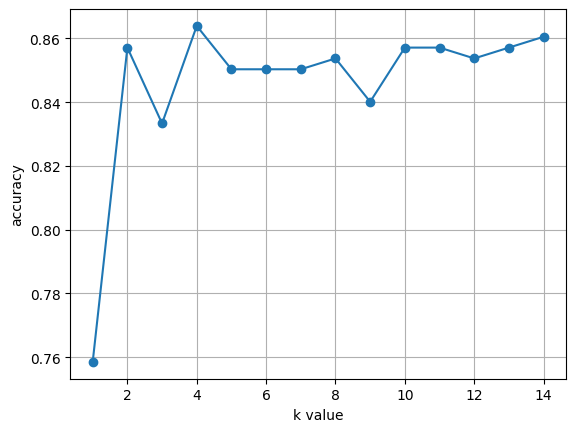

In [ ]:
plt.plot(neighbors,metrics_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
classifier.fit(X_train,y_train)
y_prediction=classifier.predict(X_test)
acc=accuracy_score(y_test,y_prediction)
print('accuracy is',accuracy_score(y_test,y_prediction))
print('precision is',precision_score(y_test,y_prediction))
print('recal is',recall_score(y_test,y_prediction))
print('f1_score is',f1_score(y_test,y_prediction))
acc=accuracy_score(y_test,y_prediction)

accuracy is 0.8639455782312925
precision is 0.42857142857142855
recal is 0.07692307692307693
f1_score is 0.13043478260869565


# **(3)SVM(support vector machien)**

In [ ]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_clf.fit(X_train,y_train)
y_svm_prediction=svm_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_svm_prediction))

[[249   6]
 [ 34   5]]


In [ ]:
print('accuracy is',accuracy_score(y_test,y_svm_prediction))
print('precision is',precision_score(y_test,y_prediction))
print('recal is',recall_score(y_test,y_prediction))
print('f1_score is',f1_score(y_test,y_prediction))

accuracy is 0.8639455782312925
precision is 0.42857142857142855
recal is 0.07692307692307693
f1_score is 0.13043478260869565


# **(4)DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ds_clf=DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_prediction=ds_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_prediction))

[[227  28]
 [ 22  17]]


In [ ]:
print('accuracy is',accuracy_score(y_test,y_prediction))
print('precision is',precision_score(y_test,y_prediction))
print('recal is',recall_score(y_test,y_prediction))
print('f1_score is',f1_score(y_test,y_prediction))

accuracy is 0.8299319727891157
precision is 0.37777777777777777
recal is 0.4358974358974359
f1_score is 0.40476190476190477


# **(5)RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_prediction_rf=rf_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_prediction_rf))

[[251   4]
 [ 33   6]]


In [ ]:
print('accuracy is',accuracy_score(y_test,y_prediction_rf))
print('precision is',precision_score(y_test,y_prediction))
print('recal is',recall_score(y_test,y_prediction))
print('f1_score is',f1_score(y_test,y_prediction))

accuracy is 0.8741496598639455
precision is 0.37777777777777777
recal is 0.4358974358974359
f1_score is 0.40476190476190477




*   Random Forest classifier gives more accuracy . so we select Random Forest Model



# **CROSS VALIDATION**



*   K-FOLD



In [ ]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=10)



*   printing the folds



In [ ]:
for train_index,test_index in kf.split(x):
  print('train_index:',train_index)
  print('test_index:',test_index)

train_index: [ 147  148  149 ... 1467 1468 1469]
test_index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146]
train_index: [   0    1    2 ... 1467 1468 1469]
test_index: [147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 



*   calculating the cross validation score for the fold



In [ ]:
score=cross_val_score(rf_clf,x,y,cv=kf)
print('cross validation scores are {}'.format(score))

cross validation scores are [0.83673469 0.85714286 0.8707483  0.87755102 0.85714286 0.80952381
 0.85034014 0.8707483  0.86394558 0.87755102]




*   getting the avg score



In [ ]:
score=cross_val_score(rf_clf,x,y,cv=kf)
print('averagecross validation scores: {}'.format(score.mean()))

averagecross validation scores: 0.8503401360544217


# **TUNNIG**

Fine-Tune the Model using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print('Best_params',grid_search.best_params_)
print('Best_score',grid_search.best_score_)

Best_params {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best_score 0.8639523981247746


**Evaluate  the Final Model on Test Data**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Train the final model with the best parameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = final_model.predict(X_test)

In [ ]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Confusion Matrix:
[[253   2]
 [ 35   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



SAVING THE MODEL

In [ ]:
import joblib

# Save the final model to a file
model_filename = 'final_random_forest_model.pkl'
joblib.dump(final_model, model_filename)

print(f'Model saved to {model_filename}')

Model saved to final_random_forest_model.pkl


In [ ]:
import pickle

# Save the final model to a file
model_filename = 'final_random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(final_model, file)